In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np

compositions = pd.read_csv('../data/data/calib/ccam_calibration_compositions.csv')

compositions.head()

,Target,Spectrum Name,Sample Name,SiO2,TiO2,Al2O3,FeOT,MnO,MgO,CaO,Na2O,K2O,MOC total,Used for 2015 calibration,Used for 2021 Mn calibration,Used for 2022 Li calibration
0,AGV2,AGV2,AGV2,59.3,1.05,16.91,6.02,0.099,1.79,5.20,4.19,2.88,97.44,1.0,1.0,1.0
1,BCR-2,BCR2,BCR2,54.1,2.26,13.50,12.42,0.200,3.59,7.12,3.16,1.79,98.14,1.0,1.0,1.0
2,BEN,BEN,BEN,38.2,2.61,10.07,11.61,0.200,13.15,13.87,3.18,1.39,94.28,1.0,1.0,1.0
3,BHVO2,BHVO2,BHVO2,49.9,2.73,13.50,11.07,0.167,7.23,11.40,2.22,0.52,98.74,1.0,1.0,1.0
4,BIR-1a,BIR1,BIR1,47.7,0.97,15.40,10.19,0.176,9.7,13.40,1.81,0.03,99.38,1.0,1.0,1.0


In [2]:
import seaborn as sns
from lib.reproduction import major_oxides

# Selecting only the major oxides from the dataset

major_oxides_data = compositions[major_oxides]
major_oxides_data.head()

,SiO2,TiO2,Al2O3,FeOT,MgO,CaO,Na2O,K2O
0,59.3,1.05,16.91,6.02,1.79,5.20,4.19,2.88
1,54.1,2.26,13.50,12.42,3.59,7.12,3.16,1.79
2,38.2,2.61,10.07,11.61,13.15,13.87,3.18,1.39
3,49.9,2.73,13.50,11.07,7.23,11.40,2.22,0.52
4,47.7,0.97,15.40,10.19,9.7,13.40,1.81,0.03


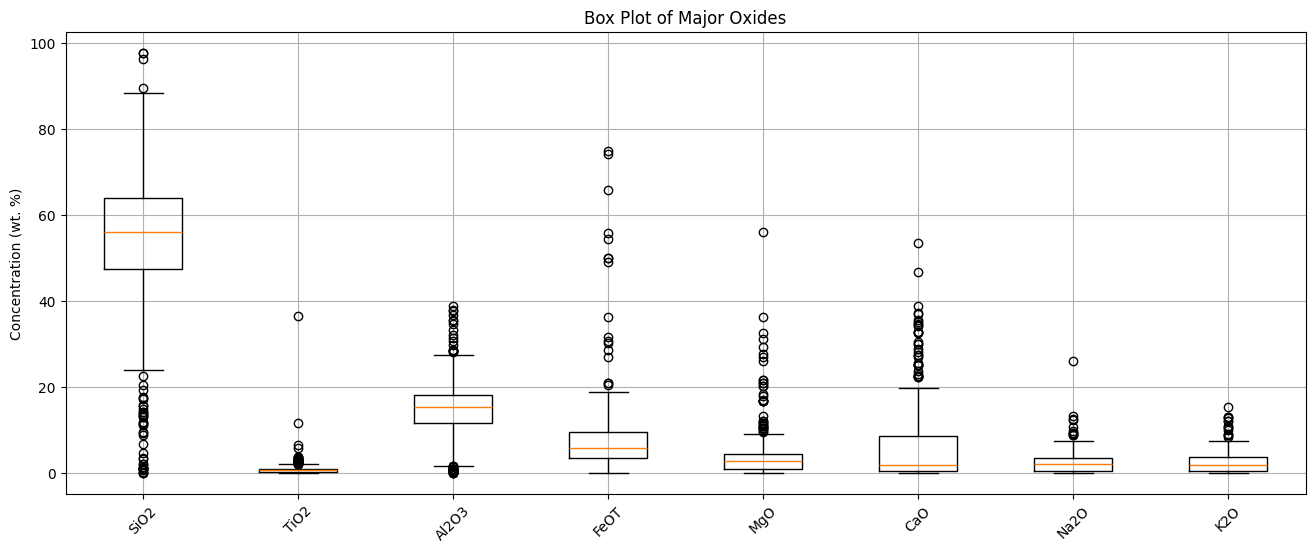

In [3]:
# Cleaning the data by removing non-numeric values and handling NaNs
cleaned_data = major_oxides_data.apply(pd.to_numeric, errors='coerce')
cleaned_data = cleaned_data.dropna()

plt.figure(figsize=(16, 6))
plt.boxplot(cleaned_data.values, labels=major_oxides)
plt.title('Box Plot of Major Oxides')
plt.ylabel('Concentration (wt. %)')
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

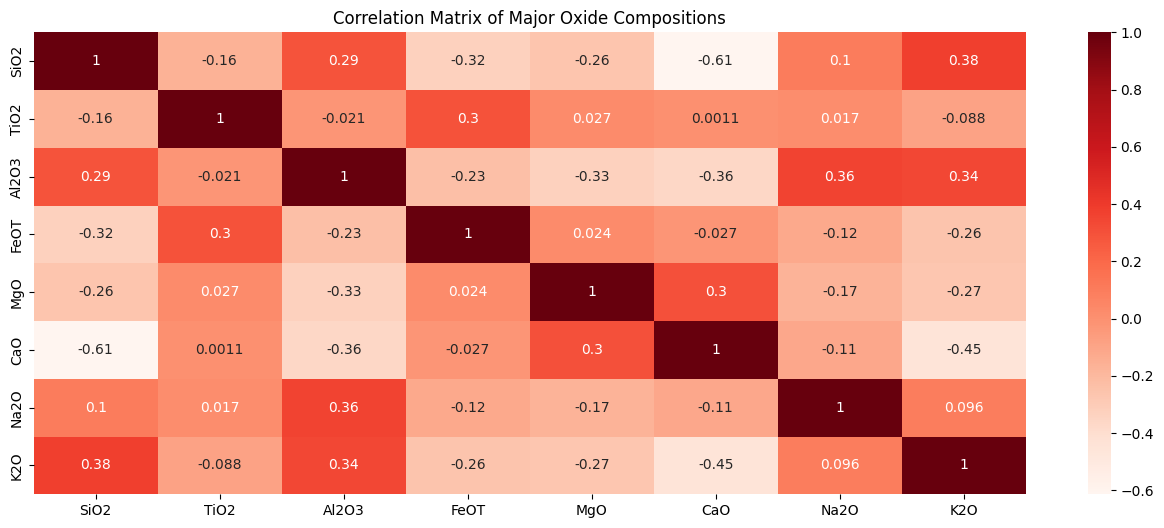

In [6]:
cccorr = cleaned_data.corr()

# plot
plt.figure(figsize=(16, 6))
sns.heatmap(cccorr, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Matrix of Major Oxide Compositions')
plt.show()  